# A Notebook demonstrating data manipulation and visualization #
_____________________________________________________________________________________

## Import Libraries ##

In [1]:
import os
import numpy as np
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

## Topic 1: Intrduction to Data Manipulation ##

### Sec 1: Data Structures in pandas ###

#### Series: Create ####

In [2]:
s = pd.Series(np.random.randn(5), index=["a", "b", "c", "d", "e"])
s

a   -1.255640
b   -1.410960
c   -0.498500
d    1.193669
e    0.800855
dtype: float64

#### Series: Indexing and data operations ####

In [4]:
s['a']

-1.2556403311359505

In [5]:
s[['a', 'c']]

a   -1.25564
c   -0.49850
dtype: float64

In [6]:
s[0]

-1.2556403311359505

In [7]:
s[s < 0]

a   -1.25564
b   -1.41096
c   -0.49850
dtype: float64

In [8]:
np.power(s, 4)

a    2.485770
b    3.963314
c    0.061753
d    2.030188
e    0.411353
dtype: float64

In [9]:
s.to_numpy()

array([-1.25564033, -1.41095971, -0.49849996,  1.19366936,  0.80085451])

In [11]:
s = pd.Series(np.random.randn(5), name="something")
s

0    0.180849
1    1.053839
2    0.612013
3    0.156671
4    0.258561
Name: something, dtype: float64

#### DataFrame: Create ####

In [12]:
d = {"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]), "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [13]:
pd.DataFrame(d, index=["d", "a", "c"])

,one,two
d,NaN,4.0
a,1.0,1.0
c,3.0,3.0


In [14]:
pd.DataFrame(d, index=["d", "a"], columns=["two", "three"])

,two,three
d,4.0,NaN
a,1.0,NaN


In [15]:
d = {"one": [1.0, 2.0, 3.0], "two": [3.0, 2.0, 1.0]}
pd.DataFrame(d)

,one,two
0,1.0,3.0
1,2.0,2.0
2,3.0,1.0


In [16]:
pd.DataFrame(d, index=["a", "b", "c"])

,one,two
a,1.0,3.0
b,2.0,2.0
c,3.0,1.0


#### DataFrame: Indexing and selection ####

In [31]:
d = {"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]), "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"])}
df = pd.DataFrame(d)
df

,one,two
a,1.0,1.0
b,2.0,2.0
c,3.0,3.0
d,NaN,4.0


In [19]:
df["one"]

a    1.0
b    2.0
c    3.0
d    NaN
Name: one, dtype: float64

In [25]:
df["flag"] = df["one"] > 2
df

,one,two,flag
a,1.0,1.0,False
b,2.0,2.0,False
c,3.0,3.0,True
d,NaN,4.0,False


In [33]:
del df["two"]
df

,one,newcol
a,1.0,Python
b,2.0,Python
c,3.0,Python
d,NaN,Python


In [32]:
df["newcol"] = "Python"
df

,one,two,newcol
a,1.0,1.0,Python
b,2.0,2.0,Python
c,3.0,3.0,Python
d,NaN,4.0,Python


In [34]:
df.insert(1, "bar", df["one"])
df

,one,bar,newcol
a,1.0,1.0,Python
b,2.0,2.0,Python
c,3.0,3.0,Python
d,NaN,NaN,Python


In [36]:
df.assign(newcol2 = np.power(df['one'], 2))

,one,bar,newcol,newcol2
a,1.0,1.0,Python,1.0
b,2.0,2.0,Python,4.0
c,3.0,3.0,Python,9.0
d,NaN,NaN,Python,NaN


### Sec 2: IO Tools and Essential Functionality ###

#### Load data into dataframes ####

In [71]:
dailyActivity = pd.read_csv('./data/dailyActivity_merged.csv')
dailyCalories = pd.read_csv('./data/dailyCalories_merged.csv')
dailyIntensities = pd.read_csv('./data/dailyIntensities_merged.csv')
dailySteps = pd.read_csv('./data/dailySteps_merged.csv')
sleepDay = pd.read_csv('./data/sleepDay_merged.csv')
weightLogInfo = pd.read_csv('./data/weightLogInfo_merged.csv')
sleepDay.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


#### Explore the data ####

In [38]:
dailyActivity.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776


In [39]:
dailyActivity.tail(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
937,8877689391,5/10/2016,10733,8.150000,8.150000,0.0,1.35,0.46,6.28,0.0,18,11,224,1187,2832
938,8877689391,5/11/2016,21420,19.559999,19.559999,0.0,13.22,0.41,5.89,0.0,88,12,213,1127,3832
939,8877689391,5/12/2016,8064,6.120000,6.120000,0.0,1.82,0.04,4.25,0.0,23,1,137,770,1849


In [40]:
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [41]:
dailyActivity.shape

(940, 15)

In [42]:
dailyActivity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


In [43]:
dailyActivity.describe(percentiles=[0.2, 0.4, 0.6, 0.8])

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
20%,2.026352e+09,2991.800000,2.056000,2.056000,0.000000,0.000000,0.000000,1.490000,0.000000,0.000000,0.000000,103.600000,707.800000,1725.000000
40%,4.020333e+09,6116.600000,4.266000,4.266000,0.000000,0.000000,0.000000,2.776000,0.000000,0.000000,0.000000,171.600000,852.600000,2010.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000
60%,5.553957e+09,8865.400000,6.260000,6.260000,0.000000,0.724000,0.400000,3.940000,0.000000,12.000000,10.000000,225.000000,1122.000000,2364.600000
80%,7.086362e+09,11599.000000,8.256000,8.234000,0.000000,2.622000,0.962000,5.110000,0.000000,41.000000,23.000000,283.000000,1272.600000,2899.600000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000


### Sec 3: Time Series and Date Functionality ###

#### Converting from object to date ####

In [97]:
dailyActivity['ActivityDate'] = pd.to_datetime(dailyActivity['ActivityDate'])
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, l0 to l939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes     

#### Create date/time fields in dataframes ####

In [45]:
dti = pd.date_range("2020-01-01", periods=4, freq="2H")
dti

DatetimeIndex(['2020-01-01 00:00:00', '2020-01-01 02:00:00',
               '2020-01-01 04:00:00', '2020-01-01 06:00:00'],
              dtype='datetime64[ns]', freq='2H')

In [46]:
d = {"one": pd.Series([1.0, 2.0, 3.0], index=["a", "b", "c"]), "two": pd.Series([1.0, 2.0, 3.0, 4.0], index=["a", "b", "c", "d"]), "date":dti}
df=pd.DataFrame(d)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, a to d
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   one     3 non-null      float64       
 1   two     4 non-null      float64       
 2   date    4 non-null      datetime64[ns]
dtypes: datetime64[ns](1), float64(2)
memory usage: 128.0+ bytes


In [48]:
df['date'] = df['date'] + pd.Timedelta("2 hours")
df

,one,two,date
a,1.0,1.0,2020-01-01 04:00:00
b,2.0,2.0,2020-01-01 06:00:00
c,3.0,3.0,2020-01-01 08:00:00
d,NaN,4.0,2020-01-01 10:00:00


In [49]:
df['date'] = df['date'] + pd.Timedelta("2 days")
df

,one,two,date
a,1.0,1.0,2020-01-03 04:00:00
b,2.0,2.0,2020-01-03 06:00:00
c,3.0,3.0,2020-01-03 08:00:00
d,NaN,4.0,2020-01-03 10:00:00


In [50]:
df['dateDoW'] = df['date'].dt.day_name()
df

,one,two,date,dateDoW
a,1.0,1.0,2020-01-03 04:00:00,Friday
b,2.0,2.0,2020-01-03 06:00:00,Friday
c,3.0,3.0,2020-01-03 08:00:00,Friday
d,NaN,4.0,2020-01-03 10:00:00,Friday


### Sec 4: Indexing and Data Selection ###

#### Indexing by boolean vectors ####

In [98]:
dailyActivity['ActivityDoW'] = dailyActivity['ActivityDate'].dt.day_name()
dailyActivity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 940 entries, l0 to l939
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes     

In [52]:
dailyActivity['ActivityDoW'] =='Saturday'

0      False
1      False
2      False
3      False
4       True
       ...  
935    False
936    False
937    False
938    False
939    False
Name: ActivityDoW, Length: 940, dtype: bool

In [53]:
sat_activity = dailyActivity[dailyActivity['ActivityDoW']=='Saturday']
sat_activity.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDoW
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday
11,1503960366,2016-04-23,14371,9.04,9.04,0.0,2.81,0.87,5.36,0.0,41,21,262,732,1949,Saturday
18,1503960366,2016-04-30,14673,9.25,9.25,0.0,3.56,1.42,4.27,0.0,52,34,217,712,1947,Saturday


In [54]:
we_activity = dailyActivity[(dailyActivity['ActivityDoW']=='Saturday') | (dailyActivity['ActivityDoW']=='Sunday')]
we_activity.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDoW
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday
11,1503960366,2016-04-23,14371,9.04,9.04,0.0,2.81,0.87,5.36,0.0,41,21,262,732,1949,Saturday


In [55]:
we_activity = dailyActivity[dailyActivity['ActivityDoW'].isin(['Saturday', 'Sunday'])]
we_activity.head(3)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDoW
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday
11,1503960366,2016-04-23,14371,9.04,9.04,0.0,2.81,0.87,5.36,0.0,41,21,262,732,1949,Saturday


#### Indexing by integer location ####

In [56]:
dailyActivity.iloc[100,:]

Id                                   1844505072
ActivityDate                2016-04-20 00:00:00
TotalSteps                                    8
TotalDistance                              0.01
TrackerDistance                            0.01
LoggedActivitiesDistance                    0.0
VeryActiveDistance                          0.0
ModeratelyActiveDistance                    0.0
LightActiveDistance                        0.01
SedentaryActiveDistance                     0.0
VeryActiveMinutes                             0
FairlyActiveMinutes                           0
LightlyActiveMinutes                          1
SedentaryMinutes                           1439
Calories                                   1349
ActivityDoW                           Wednesday
Name: 100, dtype: object

In [57]:
dailyActivity.iloc[100, [2, 3, 4]]

TotalSteps            8
TotalDistance      0.01
TrackerDistance    0.01
Name: 100, dtype: object

In [58]:
dailyActivity.iloc[100:103, [2, 4]]

,TotalSteps,TrackerDistance
100,8,0.01
101,8054,5.32
102,5372,3.55


#### Indexing by label ####

In [59]:
dailyActivity.loc[100,:]

Id                                   1844505072
ActivityDate                2016-04-20 00:00:00
TotalSteps                                    8
TotalDistance                              0.01
TrackerDistance                            0.01
LoggedActivitiesDistance                    0.0
VeryActiveDistance                          0.0
ModeratelyActiveDistance                    0.0
LightActiveDistance                        0.01
SedentaryActiveDistance                     0.0
VeryActiveMinutes                             0
FairlyActiveMinutes                           0
LightlyActiveMinutes                          1
SedentaryMinutes                           1439
Calories                                   1349
ActivityDoW                           Wednesday
Name: 100, dtype: object

In [72]:
dailyActivity.set_index('l' + dailyActivity.index.astype(str), inplace=True)
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
l0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
l1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
l2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
l3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
l4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [73]:
dailyActivity.loc['l100', ['TotalSteps', 'Calories', 'ActivityDate']]

TotalSteps              8
Calories             1349
ActivityDate    4/20/2016
Name: l100, dtype: object

In [74]:
dailyActivity.loc[['l100', 'l101', 'l102'], ['TotalSteps', 'Calories', 'ActivityDate']]

,TotalSteps,Calories,ActivityDate
l100,8,1349,4/20/2016
l101,8054,2062,4/21/2016
l102,5372,1827,4/22/2016


#### Indexing by column label and row slicing ####

In [75]:
dailyActivity[['ActivityDate', 'TotalSteps']]

,ActivityDate,TotalSteps
l0,4/12/2016,13162
l1,4/13/2016,10735
l2,4/14/2016,10460
l3,4/15/2016,9762
l4,4/16/2016,12669
...,...,...
l935,5/8/2016,10686
l936,5/9/2016,20226
l937,5/10/2016,10733
l938,5/11/2016,21420


In [76]:
dailyActivity[dailyActivity.columns[[1,2]]]

,ActivityDate,TotalSteps
l0,4/12/2016,13162
l1,4/13/2016,10735
l2,4/14/2016,10460
l3,4/15/2016,9762
l4,4/16/2016,12669
...,...,...
l935,5/8/2016,10686
l936,5/9/2016,20226
l937,5/10/2016,10733
l938,5/11/2016,21420


In [77]:
dailyActivity[10:15]

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
l10,1503960366,4/22/2016,12764,8.13,8.13,0.0,4.76,1.12,2.24,0.0,66,27,130,1217,1827
l11,1503960366,4/23/2016,14371,9.04,9.04,0.0,2.81,0.87,5.36,0.0,41,21,262,732,1949
l12,1503960366,4/24/2016,10039,6.41,6.41,0.0,2.92,0.21,3.28,0.0,39,5,238,709,1788
l13,1503960366,4/25/2016,15355,9.80,9.80,0.0,5.29,0.57,3.94,0.0,73,14,216,814,2013
l14,1503960366,4/26/2016,13755,8.79,8.79,0.0,2.33,0.92,5.54,0.0,31,23,279,833,1970


In [78]:
dailyActivity[10:15][['TotalSteps', 'TotalDistance']]

,TotalSteps,TotalDistance
l10,12764,8.13
l11,14371,9.04
l12,10039,6.41
l13,15355,9.80
l14,13755,8.79


#### Row slicing by label ####

In [79]:
dailyActivity.loc['l100':'l103'][['Id', 'TotalSteps']]

,Id,TotalSteps
l100,1844505072,8
l101,1844505072,8054
l102,1844505072,5372
l103,1844505072,3570


In [80]:
dailyActivity.loc['l100':'l103', 'Id':'TotalSteps']

,Id,ActivityDate,TotalSteps
l100,1844505072,4/20/2016,8
l101,1844505072,4/21/2016,8054
l102,1844505072,4/22/2016,5372
l103,1844505072,4/23/2016,3570


In [85]:
dailyActivity.loc['l100':'l103', 'Id'] = 0
dailyActivity.loc['l100':'l103']

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
l100,0,4/20/2016,8,0.01,0.01,0.0,0.00,0.00,0.01,0.0,0,0,1,1439,1349
l101,0,4/21/2016,8054,5.32,5.32,0.0,0.12,0.52,4.68,0.0,2,13,308,1117,2062
l102,0,4/22/2016,5372,3.55,3.55,0.0,0.00,0.00,3.55,0.0,0,0,220,1220,1827
l103,0,4/23/2016,3570,2.36,2.36,0.0,0.00,0.00,2.36,0.0,0,0,139,1301,1645


In [86]:
dailyActivity.iloc[100:103, dailyActivity.columns.get_loc('Id'):dailyActivity.columns.get_loc('TotalSteps')]

,Id,ActivityDate
l100,0,4/20/2016
l101,0,4/21/2016
l102,0,4/22/2016


#### Random sample selection ####

In [87]:
dailyActivity.sample(n=4)[['Id', 'TotalSteps', 'TotalDistance']]

,Id,TotalSteps,TotalDistance
l260,2347167796,9482,6.38
l228,2320127002,4165,2.81
l777,8053475328,16057,12.51
l651,6290855005,7706,5.83


In [88]:
dailyActivity.sample(n=4, weights=np.random.rand(len(dailyActivity)))[['Id', 'TotalSteps', 'TotalDistance']]

,Id,TotalSteps,TotalDistance
l593,5577150313,0,0.00
l222,2320127002,6559,4.42
l259,2347167796,9471,6.26
l149,1927972279,0,0.00


In [89]:
dailyActivity.sample(n=4, weights=np.random.rand(len(dailyActivity)), replace=True)[['Id', 'TotalSteps', 'TotalDistance']]

,Id,TotalSteps,TotalDistance
l795,8053475328,12465,9.38
l184,2022484408,9117,6.41
l392,4319703577,4935,3.31
l901,8792009665,2421,1.55


In [90]:
dailyActivity.sample(frac=0.003, replace=True)[['Id', 'TotalSteps', 'TotalDistance']]

,Id,TotalSteps,TotalDistance
l184,2022484408,9117,6.41
l358,4020332650,0,0.00
l71,1644430081,1223,0.89


#### Misc data selection functionality ####

In [91]:
dailyActivity.where(dailyActivity['TotalSteps']>11100)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
l0,1.503960e+09,4/12/2016,13162.0,8.500000,8.500000,0.0,1.88,0.55,6.06,0.00,25.0,13.0,328.0,728.0,1985.0
l1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l4,1.503960e+09,4/16/2016,12669.0,8.160000,8.160000,0.0,2.71,0.41,5.04,0.00,36.0,10.0,221.0,773.0,1863.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l935,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l936,8.877689e+09,5/9/2016,20226.0,18.250000,18.250000,0.0,11.10,0.80,6.24,0.05,73.0,19.0,217.0,1131.0,3710.0
l937,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l938,8.877689e+09,5/11/2016,21420.0,19.559999,19.559999,0.0,13.22,0.41,5.89,0.00,88.0,12.0,213.0,1127.0,3832.0


In [92]:
dailyActivity.mask(dailyActivity['TotalSteps']>11100)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
l0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l1,1.503960e+09,4/13/2016,10735.0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21.0,19.0,217.0,776.0,1797.0
l2,1.503960e+09,4/14/2016,10460.0,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30.0,11.0,181.0,1218.0,1776.0
l3,1.503960e+09,4/15/2016,9762.0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29.0,34.0,209.0,726.0,1745.0
l4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
l935,8.877689e+09,5/8/2016,10686.0,8.11,8.11,0.0,1.08,0.20,6.80,0.0,17.0,4.0,245.0,1174.0,2847.0
l936,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
l937,8.877689e+09,5/10/2016,10733.0,8.15,8.15,0.0,1.35,0.46,6.28,0.0,18.0,11.0,224.0,1187.0,2832.0
l938,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [93]:
dailyActivity2 = dailyActivity
dailyActivity2.loc['l120':'l122', 'Id'] = 0
dailyActivity.loc['l120':'l122', 'Id']

l120    0
l121    0
l122    0
Name: Id, dtype: int64

In [94]:
dailyActivity3 = dailyActivity.copy(deep=False)
dailyActivity4 = dailyActivity.copy(deep=True)

#### Dataframe index change ####

In [99]:
sat_activity = dailyActivity[dailyActivity['ActivityDoW']=='Saturday'][['Id', 'TotalSteps', 'TotalDistance', 'Calories']]
sat_activity.head(3)

,Id,TotalSteps,TotalDistance,Calories
l4,1503960366,12669,8.16,1863
l11,1503960366,14371,9.04,1949
l18,1503960366,14673,9.25,1947


In [102]:
sat_activity = dailyActivity[dailyActivity['ActivityDoW']=='Saturday'][['Id', 'TotalSteps', 'TotalDistance', 'Calories']].reset_index()
sat_activity.head()

,index,Id,TotalSteps,TotalDistance,Calories
0,l4,1503960366,12669,8.16,1863
1,l11,1503960366,14371,9.04,1949
2,l18,1503960366,14673,9.25,1947
3,l25,1503960366,11992,7.71,1821
4,l35,1624580081,5370,3.49,1463


In [103]:
sat_activity = dailyActivity[dailyActivity['ActivityDoW']=='Saturday'][['Id', 'TotalSteps', 'TotalDistance', 'Calories']].reset_index(drop=True)
sat_activity.head()

,Id,TotalSteps,TotalDistance,Calories
0,1503960366,12669,8.16,1863
1,1503960366,14371,9.04,1949
2,1503960366,14673,9.25,1947
3,1503960366,11992,7.71,1821
4,1624580081,5370,3.49,1463


In [106]:
sat_activity.set_index('Id', inplace=True)
sat_activity.head()

,TotalSteps,TotalDistance,Calories
Id,,,
1503960366,12669,8.16,1863
1503960366,14371,9.04,1949
1503960366,14673,9.25,1947
1503960366,11992,7.71,1821
1624580081,5370,3.49,1463


#### Editing/dropping dataframe columns ####

In [107]:
dailyActivity['TotalSteps'] = pd.cut(dailyActivity['TotalSteps'], bins=3, labels=('low', 'medium', 'high'))
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDoW
l0,1503960366,2016-04-12,medium,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
l1,1503960366,2016-04-13,low,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
l2,1503960366,2016-04-14,low,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
l3,1503960366,2016-04-15,low,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
l4,1503960366,2016-04-16,medium,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [108]:
categories = {'low':0, 'medium':1, 'high':2}
dailyActivity['TotalSteps'] = dailyActivity['TotalSteps'].map(categories)
dailyActivity.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,ActivityDoW
l0,1503960366,2016-04-12,1,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
l1,1503960366,2016-04-13,0,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
l2,1503960366,2016-04-14,0,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
l3,1503960366,2016-04-15,0,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
l4,1503960366,2016-04-16,1,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [109]:
sat_activity.drop(['TotalSteps', 'Calories'], axis=1, inplace=True)
sat_activity.head(3)

,TotalDistance
Id,
1503960366,8.16
1503960366,9.04
1503960366,9.25


In [110]:
sat_activity.rename(columns={'TotalDistance':'dist'}, inplace=True)
sat_activity.head(3)

,dist
Id,
1503960366,8.16
1503960366,9.04
1503960366,9.25


#### Hierarchical indexing (Multiindexing) ####

In [112]:
arrays = [["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],["one", "two", "one", "two", "one", "two", "one", "two"]]
tuples = list(zip(*arrays))
tuples

[('bar', 'one'),
 ('bar', 'two'),
 ('baz', 'one'),
 ('baz', 'two'),
 ('foo', 'one'),
 ('foo', 'two'),
 ('qux', 'one'),
 ('qux', 'two')]

In [114]:
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
index

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two'),
            ('qux', 'one'),
            ('qux', 'two')],
           names=['first', 'second'])

In [115]:
s = pd.Series(np.random.randn(8), index=index)
s

first  second
bar    one      -0.475502
       two       1.066010
baz    one      -0.588970
       two       0.099537
foo    one       0.005264
       two      -0.914484
qux    one      -0.704099
       two       0.037467
dtype: float64

In [116]:
iterables = [["bar", "baz", "foo"], ["one", "two"]]
pd.MultiIndex.from_product(iterables, names=["first", "second"])

MultiIndex([('bar', 'one'),
            ('bar', 'two'),
            ('baz', 'one'),
            ('baz', 'two'),
            ('foo', 'one'),
            ('foo', 'two')],
           names=['first', 'second'])

#### Slicing in hierarchical indexing ####

In [117]:
df = pd.DataFrame(np.random.randn(8,4), index=index)
df

0         1         2         3
first second                                        
bar   one    -1.238135 -0.785051 -2.309669 -1.111954
      two    -0.878852 -0.140207  0.716310 -0.900689
baz   one    -0.192883 -1.592952 -1.121062  0.302325
      two    -0.272406 -0.428607  0.577356 -1.123088
foo   one     0.462970 -1.653007  1.048345  1.377051
      two     0.824704 -0.945058 -0.144633 -1.034913
qux   one    -0.157018  1.894164 -1.272500 -2.029648
      two    -0.457840  0.133583 -1.268091  0.987339

In [118]:
df.loc[('bar', 'two'),:]

0   -0.878852
1   -0.140207
2    0.716310
3   -0.900689
Name: (bar, two), dtype: float64

In [119]:
df.loc[[('bar', 'two'), ('foo', 'one')],:]

,,0,1,2,3
first,second,,,,
bar,two,-0.878852,-0.140207,0.716310,-0.900689
foo,one,0.462970,-1.653007,1.048345,1.377051


In [120]:
df.loc[('bar', 'two'):('foo', 'two'),:]

0         1         2         3
first second                                        
bar   two    -0.878852 -0.140207  0.716310 -0.900689
baz   one    -0.192883 -1.592952 -1.121062  0.302325
      two    -0.272406 -0.428607  0.577356 -1.123088
foo   one     0.462970 -1.653007  1.048345  1.377051
      two     0.824704 -0.945058 -0.144633 -1.034913

In [121]:
df.iloc[2, :]

0   -0.192883
1   -1.592952
2   -1.121062
3    0.302325
Name: (baz, one), dtype: float64

In [122]:
df.iloc[2:5, :]

0         1         2         3
first second                                        
baz   one    -0.192883 -1.592952 -1.121062  0.302325
      two    -0.272406 -0.428607  0.577356 -1.123088
foo   one     0.462970 -1.653007  1.048345  1.377051

#### Handling missing data ####

In [129]:
penguins = sns.load_dataset("penguins")
penguins.head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN


In [124]:
penguins.isna().head(4)

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,True,True,True,True,True


In [125]:
np.any(penguins['sex'].isna())

True

In [126]:
np.any(penguins.isna(), axis=0)

species              False
island               False
bill_length_mm        True
bill_depth_mm         True
flipper_length_mm     True
body_mass_g           True
sex                   True
dtype: bool

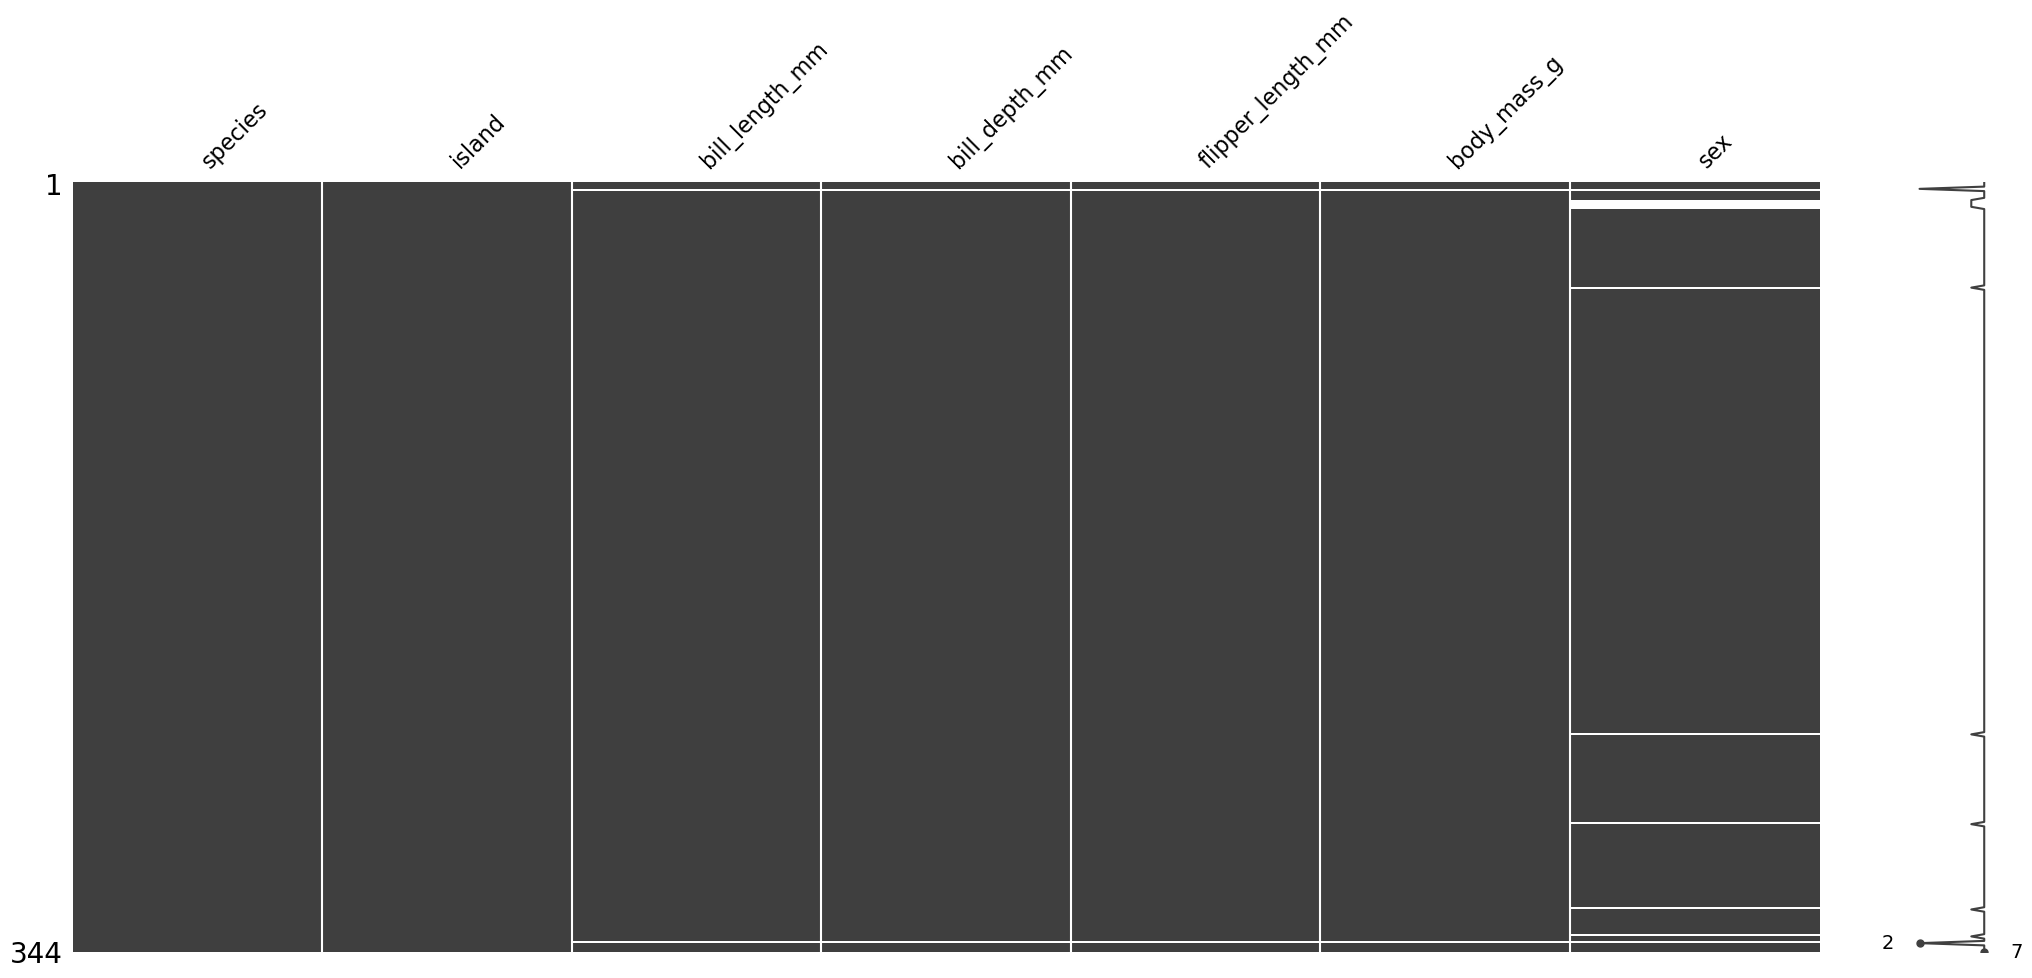

In [127]:
import missingno as msn
msn.matrix(penguins)
plt.show()

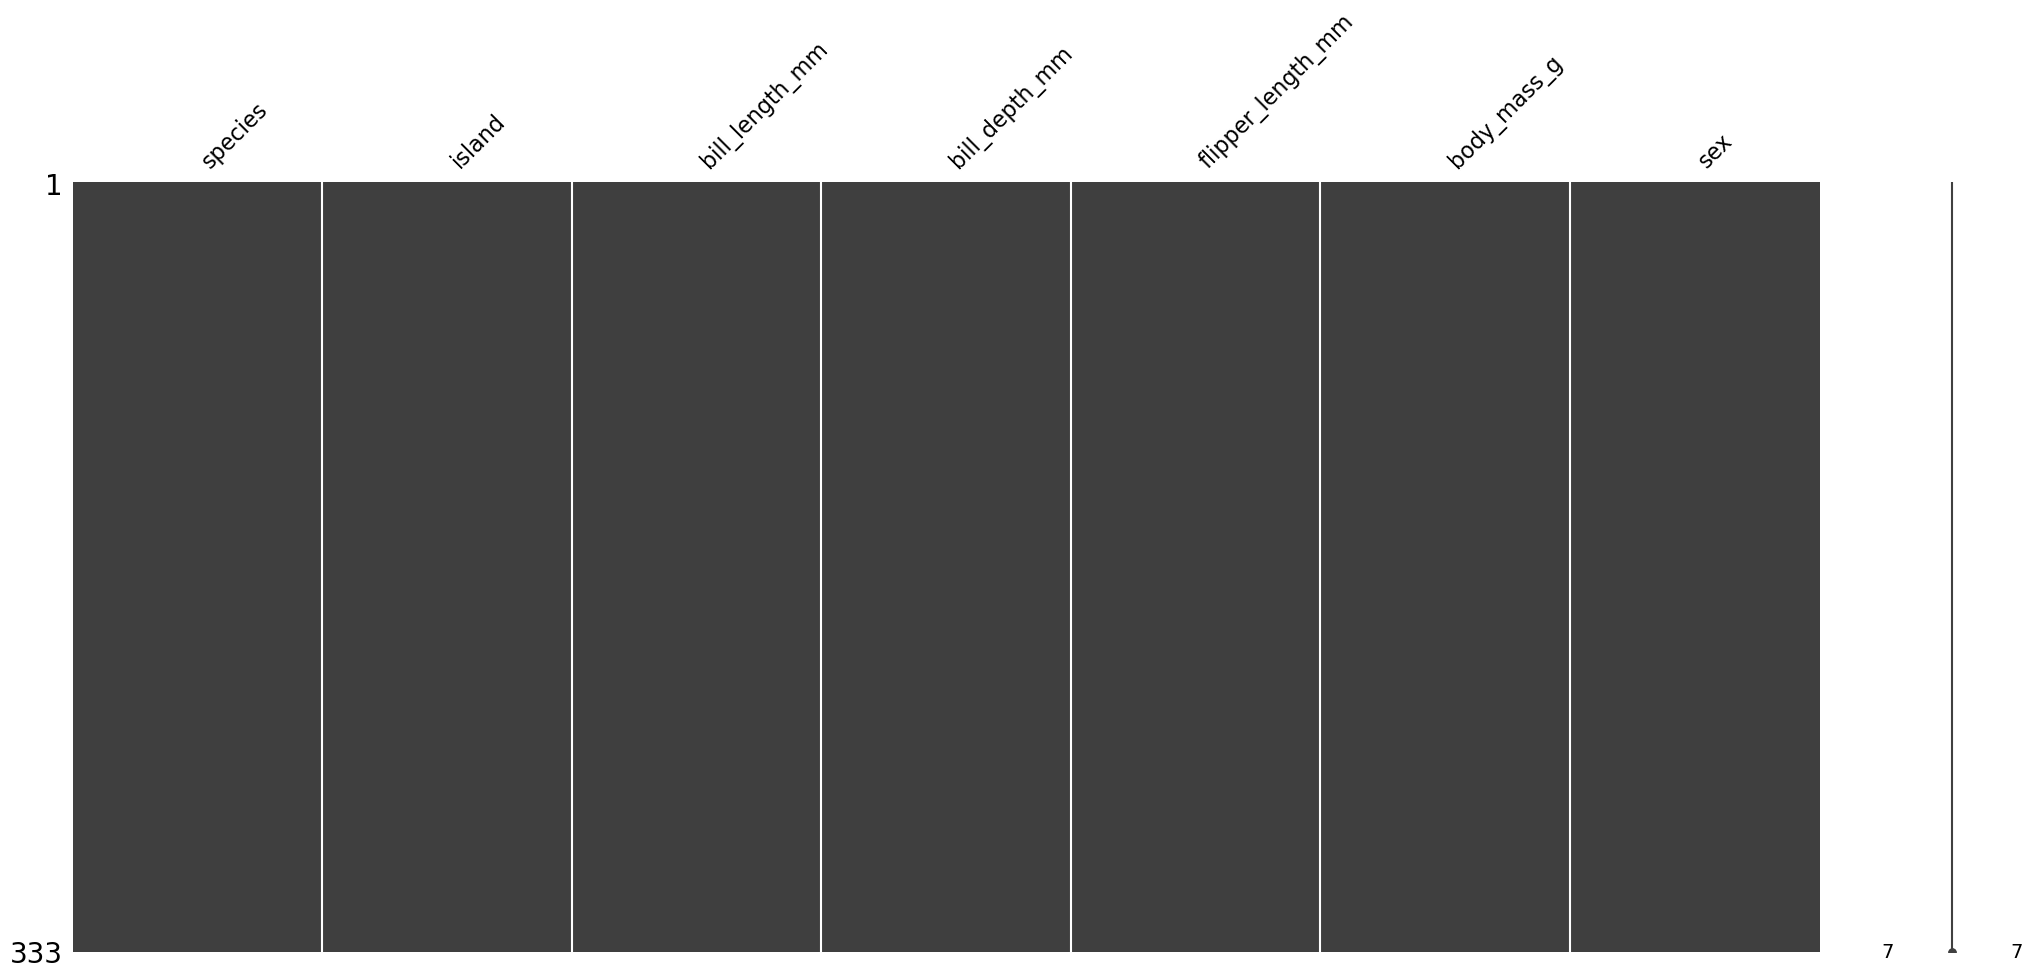

In [128]:
penguins.dropna(how='any', inplace=True)
msn.matrix(penguins)
plt.show()

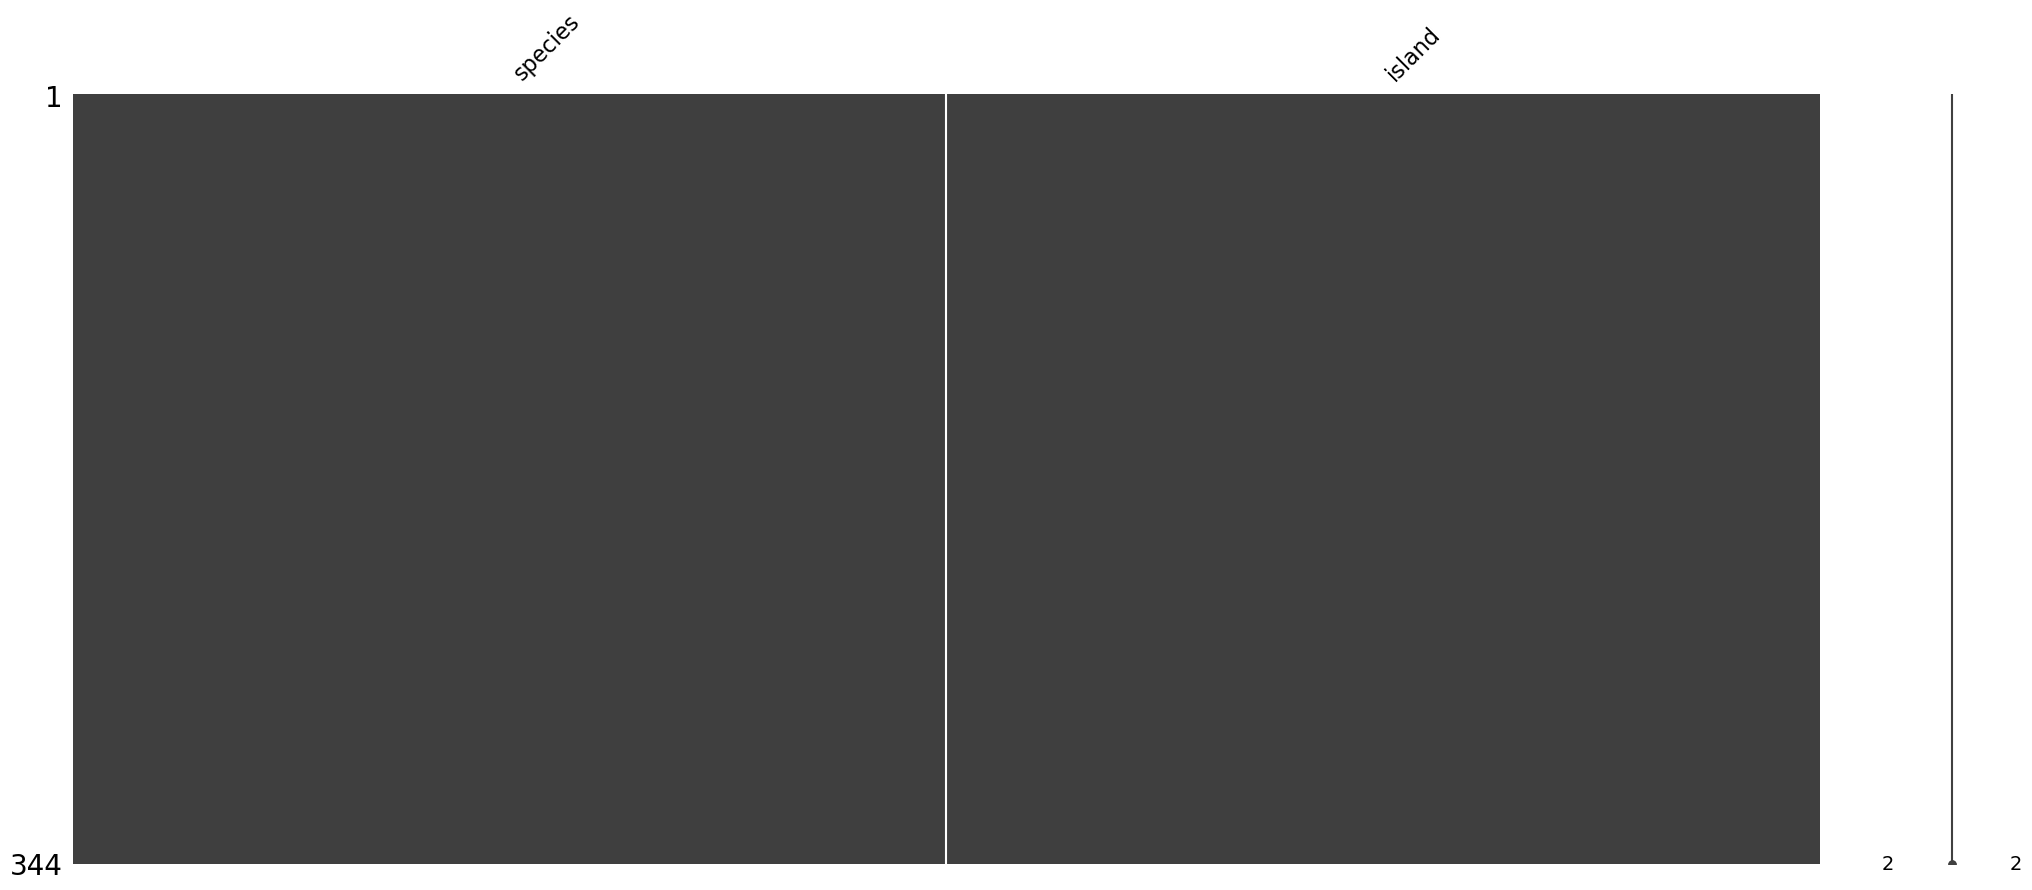

In [130]:
penguins.dropna(how='any', axis=1, inplace=True)
msn.matrix(penguins)
plt.show()

### Sec 5: Grouping and Aggregation ###

#### Group by field/column ####

In [131]:
unique_users = dailyActivity['Id'].unique()
print('Number of unique users in the database is: {}'.format(len(unique_users)))

Number of unique users in the database is: 34


In [133]:
dailyActivity.groupby('Id')['Calories'].mean()

Id
0             1463.142857
1503960366    1816.419355
1624580081    1483.354839
1644430081    2811.300000
1844505072    1605.666667
1927972279    2172.806452
2022484408    2509.967742
2026352035    1540.645161
2320127002    1724.161290
2347167796    2043.444444
2873212765    1916.967742
3372868164    1933.100000
3977333714    1513.666667
4020332650    2385.806452
4057192912    1973.750000
4319703577    2037.677419
4388161847    3093.870968
4445114986    2186.193548
4558609924    2033.258065
4702921684    2965.548387
5553957443    1875.677419
5577150313    3359.633333
6117666160    2261.142857
6290855005    2599.620690
6775888955    2131.769231
6962181067    1982.032258
7007744171    2544.000000
7086361926    2566.354839
8053475328    2945.806452
8253242879    1788.000000
8378563200    3436.580645
8583815059    2732.032258
8792009665    1962.310345
8877689391    3420.258065
Name: Calories, dtype: float64

In [134]:
dailyActivity.groupby('Id', sort=True)[['Calories', 'TotalDistance']].mean().head()

,Calories,TotalDistance
Id,,
0,1463.142857,1.605714
1503960366,1816.419355,7.809677
1624580081,1483.354839,3.914839
1644430081,2811.300000,5.295333
1844505072,1605.666667,1.735417


In [135]:
dailyActivity.groupby('Id', sort=True).agg({'Calories':'mean', 'TotalDistance':'sum'}).head()

,Calories,TotalDistance
Id,,
0,1463.142857,11.240000
1503960366,1816.419355,242.099999
1624580081,1483.354839,121.360001
1644430081,2811.300000,158.860001
1844505072,1605.666667,41.650000


In [136]:
dailyActivity.groupby('Id', sort=True).agg({'Calories':'mean', 'TotalDistance': lambda x:x.max()-x.mean()}).head()

,Calories,TotalDistance
Id,,
0,1463.142857,3.714286
1503960366,1816.419355,4.400323
1624580081,1483.354839,24.115162
1644430081,2811.300000,7.944666
1844505072,1605.666667,3.514583


In [137]:
dailyActivity.groupby('Id', sort=True)[['Calories', 'TotalDistance']].agg([np.sum, np.mean, np.std]).head(5)

Calories                          TotalDistance                    
                sum         mean         std           sum      mean       std
Id                                                                            
0             10242  1463.142857  447.424641     11.240000  1.605714  2.176632
1503960366    56309  1816.419355  352.574793    242.099999  7.809677  1.984180
1624580081    45984  1483.354839  256.582871    121.360001  3.914839  4.796242
1644430081    84339  2811.300000  507.488349    158.860001  5.295333  3.143581
1844505072    38536  1605.666667  258.297379     41.650000  1.735417  1.719575

In [138]:
dailyActivity.groupby('Id', sort=True)[['Calories', 'TotalDistance']].agg([np.sum, np.mean, np.std]).rename(columns={"sum": "x", "mean": "y", "std": "z"}).head(5)

Calories                          TotalDistance                    
                  x            y           z             x         y         z
Id                                                                            
0             10242  1463.142857  447.424641     11.240000  1.605714  2.176632
1503960366    56309  1816.419355  352.574793    242.099999  7.809677  1.984180
1624580081    45984  1483.354839  256.582871    121.360001  3.914839  4.796242
1644430081    84339  2811.300000  507.488349    158.860001  5.295333  3.143581
1844505072    38536  1605.666667  258.297379     41.650000  1.735417  1.719575

In [139]:
dailyActivity.groupby('Id', sort=True).agg(avg_cal=('Calories', 'mean'), max_dist=('TotalDistance', 'max')).head(5)

,avg_cal,max_dist
Id,,
0,1463.142857,5.320000
1503960366,1816.419355,12.210000
1624580081,1483.354839,28.030001
1644430081,2811.300000,13.240000
1844505072,1605.666667,5.250000


In [140]:
dailyActivity.groupby('Id', sort=True).agg(**{'avg>cal':('Calories', 'mean'), 'max$dist':('TotalDistance', 'max')}).head(5)

,avg>cal,max$dist
Id,,
0,1463.142857,5.320000
1503960366,1816.419355,12.210000
1624580081,1483.354839,28.030001
1644430081,2811.300000,13.240000
1844505072,1605.666667,5.250000


### Sec 6: Merge, join and concatenate ###

#### Concatenation (row stacking) ####

In [141]:
df1 = pd.DataFrame({"A": ["A0", "A1", "A2", "A3"], "B": ["B0", "B1", "B2", "B3"], "C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]}, index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [142]:
df2 = pd.DataFrame({"A": ["A4", "A5", "A6", "A7"], "B": ["B4", "B5", "B6", "B7"], "C": ["C4", "C5", "C6", "C7"], "D": ["D4", "D5", "D6", "D7"]}, index=[4, 5, 6, 7])
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [143]:
df3 = pd.DataFrame({"A": ["A8", "A9", "A10", "A11"], "B": ["B8", "B9", "B10", "B11"], "C": ["C8", "C9", "C10", "C11"], "D": ["D8", "D9", "D10", "D11"]}, index=[8, 9, 10, 11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [144]:
result = pd.concat([df1, df2, df3], axis=0)
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


#### Full outer join with concatenate ####

In [145]:
df1 = pd.DataFrame({"A": ["A0", "A1", "A2", "A3"], "B": ["B0", "B1", "B2", "B3"], "C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]}, index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [146]:
df4 = pd.DataFrame({"B": ["B2", "B3", "B6", "B7"], "D": ["D2", "D3", "D6", "D7"], "F": ["F2", "F3", "F6", "F7"]}, index=[2, 3, 6, 7])
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [147]:
result = pd.concat([df1, df4], axis=1, join='outer') #defaut option is an outer join
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


#### Inner join with concatenate ####

In [151]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


#### Concatenate dataframe with series ####

In [149]:
s1 = pd.Series(["X0", "X1", "X2", "X3"], name="X")
s1

0    X0
1    X1
2    X2
3    X3
Name: X, dtype: object

In [150]:
result = pd.concat([df1, s1], axis=1)
result

,A,B,C,D,X
0,A0,B0,C0,D0,X0
1,A1,B1,C1,D1,X1
2,A2,B2,C2,D2,X2
3,A3,B3,C3,D3,X3


#### Concatenation with group keys ####

In [152]:
df1 = pd.DataFrame({"A": ["A0", "A1", "A2", "A3"], "B": ["B0", "B1", "B2", "B3"], "C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]}, index=[0, 1, 2, 3])
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [153]:
df2 = pd.DataFrame({"A": ["A4", "A5", "A6", "A7"], "B": ["B4", "B5", "B6", "B7"], "C": ["C4", "C5", "C6", "C7"], "D": ["D4", "D5", "D6", "D7"]}, index=[4, 5, 6, 7])
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [154]:
df3 = pd.DataFrame({"A": ["A8", "A9", "A10", "A11"], "B": ["B8", "B9", "B10", "B11"], "C": ["C8", "C9", "C10", "C11"], "D": ["D8", "D9", "D10", "D11"]}, index=[8, 9, 10, 11])
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [157]:
result = pd.concat([df1, df2, df3], keys=["x", "y", "z"])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [159]:
result = pd.concat({"x": df1, "y": df2, "z": df3})
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [161]:
result.loc["x"]

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


#### Database-style left join ####

In [162]:
left = pd.DataFrame({"key1": ["K0", "K0", "K1", "K2"], "key2": ["K0", "K1", "K0", "K1"], "A": ["A0", "A1", "A2", "A3"], "B": ["B0", "B1", "B2", "B3"]})
left

,key1,key2,A,B
0,K0,K0,A0,B0
1,K0,K1,A1,B1
2,K1,K0,A2,B2
3,K2,K1,A3,B3


In [163]:
right = pd.DataFrame({"key1": ["K0", "K1", "K1", "K2"], "key2": ["K0", "K0", "K0", "K0"], "C": ["C0", "C1", "C2", "C3"], "D": ["D0", "D1", "D2", "D3"]})
right

,key1,key2,C,D
0,K0,K0,C0,D0
1,K1,K0,C1,D1
2,K1,K0,C2,D2
3,K2,K0,C3,D3


In [164]:
result = pd.merge(left, right, how="left", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN


#### Database-style right join ####

In [165]:
result = pd.merge(left, right, how="right", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2
3,K2,K0,NaN,NaN,C3,D3


#### Database-style outer join ####

In [166]:
result = pd.merge(left, right, how="outer", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K0,K1,A1,B1,NaN,NaN
2,K1,K0,A2,B2,C1,D1
3,K1,K0,A2,B2,C2,D2
4,K2,K1,A3,B3,NaN,NaN
5,K2,K0,NaN,NaN,C3,D3


#### Database-style inner join ####

In [167]:
result = pd.merge(left, right, how="inner", on=["key1", "key2"])
result

,key1,key2,A,B,C,D
0,K0,K0,A0,B0,C0,D0
1,K1,K0,A2,B2,C1,D1
2,K1,K0,A2,B2,C2,D2


#### Database-style cross join ####

In [168]:
result = pd.merge(left, right, how="cross")
result

,key1_x,key2_x,A,B,key1_y,key2_y,C,D
0,K0,K0,A0,B0,K0,K0,C0,D0
1,K0,K0,A0,B0,K1,K0,C1,D1
2,K0,K0,A0,B0,K1,K0,C2,D2
3,K0,K0,A0,B0,K2,K0,C3,D3
4,K0,K1,A1,B1,K0,K0,C0,D0
5,K0,K1,A1,B1,K1,K0,C1,D1
6,K0,K1,A1,B1,K1,K0,C2,D2
7,K0,K1,A1,B1,K2,K0,C3,D3
8,K1,K0,A2,B2,K0,K0,C0,D0
9,K1,K0,A2,B2,K1,K0,C1,D1


### Sec 7: Reshaping and Pivoting ###

#### Reshaping by melting ####

In [169]:
df = pd.DataFrame({"first": ["John", "Mary"], "last": ["Doe", "Bo"], "height": [5.5, 6.0], "weight": [130, 150]})
df

,first,last,height,weight
0,John,Doe,5.5,130
1,Mary,Bo,6.0,150


In [170]:
df.melt(id_vars=["first", "last"])

,first,last,variable,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


In [171]:
df.melt(id_vars=["first", "last"], var_name="quantity")

,first,last,quantity,value
0,John,Doe,height,5.5
1,Mary,Bo,height,6.0
2,John,Doe,weight,130.0
3,Mary,Bo,weight,150.0


#### Reshaping by pivoting ####

In [172]:
df = pd.DataFrame({"foo": ["one", "one", "one", "two", "two", "two"], "bar": ["A", "B", "C", "A", "B", "C"], "baz": [1, 2, 3, 4, 5, 6], "zoo": ["x", "y", "z", "q", "w", "t"]})
df

,foo,bar,baz,zoo
0,one,A,1,x
1,one,B,2,y
2,one,C,3,z
3,two,A,4,q
4,two,B,5,w
5,two,C,6,t


In [173]:
df.pivot(index = 'foo', columns='bar', values='baz')

bar,A,B,C
foo,,,
one,1,2,3
two,4,5,6


In [174]:
df.pivot(index = 'foo', columns=['bar','zoo'], values='baz')

bar,A,B,C,A,B,C
zoo,x,y,z,q,w,t
foo,,,,,,
one,1.0,2.0,3.0,NaN,NaN,NaN
two,NaN,NaN,NaN,4.0,5.0,6.0


#### Reshaping by stacking ####

In [176]:
tuples = list(zip(*[["bar", "bar", "baz", "baz"], ["one", "two", "one", "two"]]))
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame({'A': [1, 3, 5, 7], 'B': [2, 4, 6, 8]}, index=index)
df

A  B
first second      
bar   one     1  2
      two     3  4
baz   one     5  6
      two     7  8

In [177]:
df.stack()

first  second   
bar    one     A    1
               B    2
       two     A    3
               B    4
baz    one     A    5
               B    6
       two     A    7
               B    8
dtype: int64

#### Reshaping by unstacking ####

In [179]:
df2=df.stack()
df2.unstack()

A  B
first second      
bar   one     1  2
      two     3  4
baz   one     5  6
      two     7  8

## Topic 2: Intrduction to Data Visualization ##

### Sec 1: Line Plots ###

#### Simple line plots for the iris dataset ####

In [180]:
iris = sns.load_dataset("iris")
iris.head(5)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


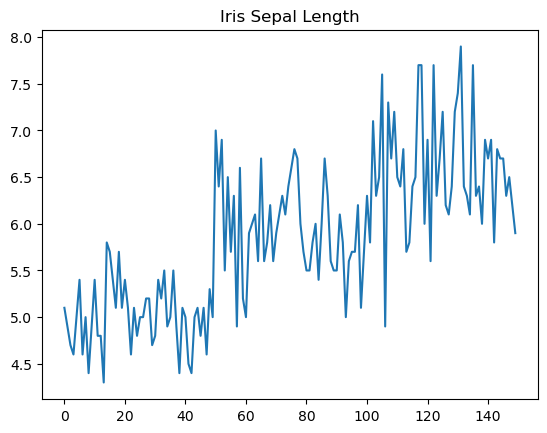

In [183]:
# plotting the line using matplotlib basic functionality
fig, ax = plt.subplots()
ax.plot(iris.index.to_list(), iris["sepal_length"])
ax.set_title("Iris Sepal Length")
plt.show()

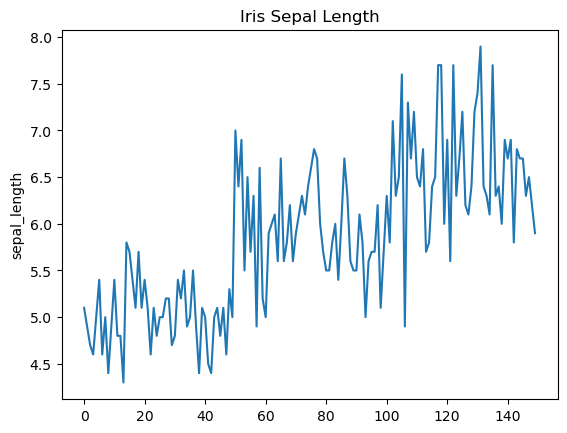

In [182]:
# Plotting the line using seaborn
fig, ax = plt.subplots()
sns.lineplot(x=iris.index.to_list(), y=iris["sepal_length"])
ax.set_title("Iris Sepal Length")
plt.show()

#### Overlaid line plots for the iris dataset ####

In [184]:
iris.drop("species", axis=1).head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


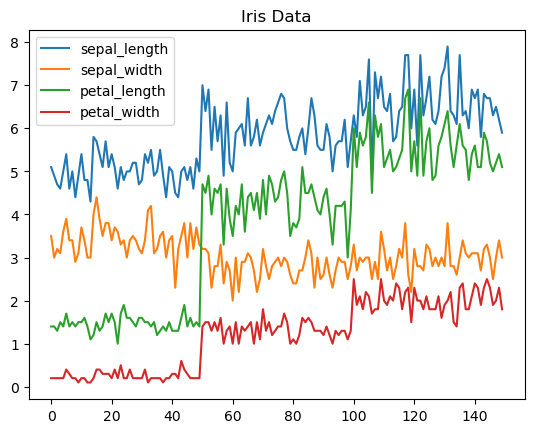

In [185]:
# Matplotlib line overlaying
fig, ax = plt.subplots()
for column in iris.columns.drop("species"):
    ax.plot(iris.index.to_list(), iris[column])
ax.set_title("Iris Data")
ax.legend(labels=iris.columns.drop("species"), loc='upper left')
plt.show()

In [186]:
# Seaborn multiple line overlaying
new_iris = iris.reset_index().drop("species", axis=1).melt(id_vars='index', var_name='property')
new_iris.head()

,index,property,value
0,0,sepal_length,5.1
1,1,sepal_length,4.9
2,2,sepal_length,4.7
3,3,sepal_length,4.6
4,4,sepal_length,5.0


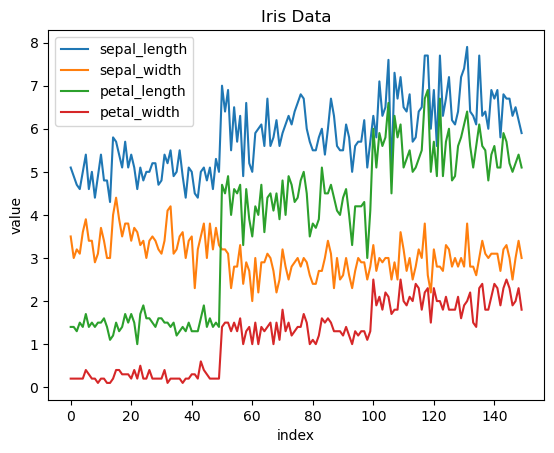

In [189]:
fig, ax = plt.subplots()
sns.lineplot(x='index', y='value', hue='property', data=new_iris)
ax.set_title("Iris Data")
ax.legend(loc='upper left')
plt.show()

#### Line plots with error bands ####

In [190]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [191]:
new_fmri = fmri[(fmri['event']=='stim')&(fmri['region']=='parietal')]
new_fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


In [192]:
fmri_gb_timep = new_fmri.groupby('timepoint')['signal'].agg([np.max, np.mean, np.min])
fmri_gb_timep.head()

,amax,mean,amin
timepoint,,,
0,0.052619,-0.024995,-0.064454
1,0.029822,-0.040460,-0.082174
2,0.077277,-0.020062,-0.110565
3,0.185581,0.061224,-0.089708
4,0.346775,0.177131,0.027879


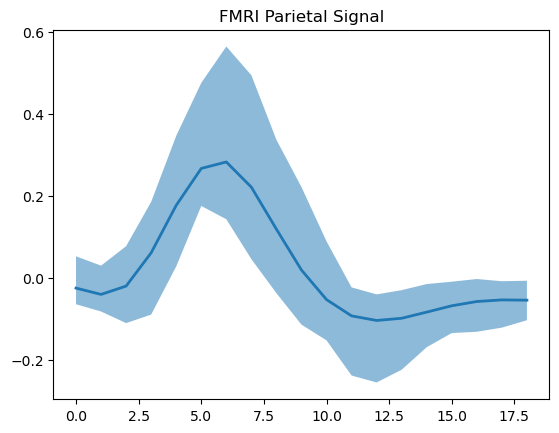

In [193]:
fig, ax = plt.subplots()
ax.fill_between(fmri_gb_timep.index.to_list(), fmri_gb_timep['amin'], fmri_gb_timep['amax'], alpha=.5, linewidth=0)
ax.plot(fmri_gb_timep.index.to_list(), fmri_gb_timep['mean'], linewidth=2)
ax.set_title("FMRI Parietal Signal")
plt.show()

In [194]:
new_fmri = fmri[(fmri['event']=='stim')&(fmri['region']=='parietal')]
new_fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


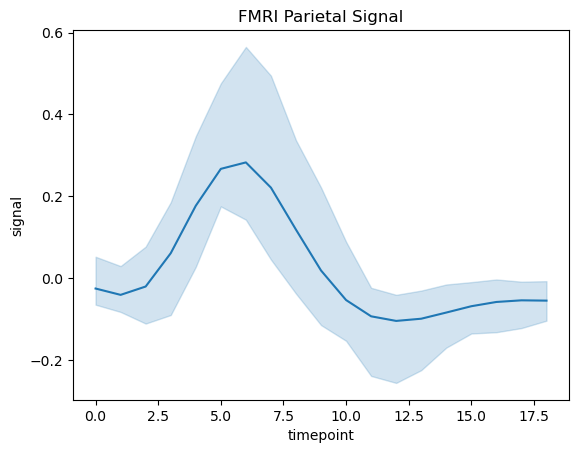

In [195]:
fig, ax = plt.subplots()
sns.lineplot(x='timepoint', y='signal', errorbar=lambda x:(x.min(), x.max()), data=new_fmri)
ax.set_title("FMRI Parietal Signal")
plt.show()

### Sec 2: Scatter Plots ###

#### Simple scatter plots ####

In [196]:
diamonds = sns.load_dataset("diamonds")
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


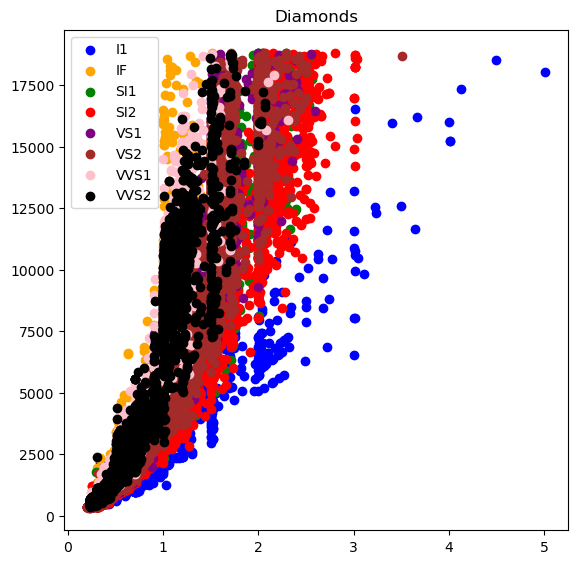

In [197]:
colors = {'I1':'blue', 'IF':'orange', 'SI1':'green', 'SI2':'red', 'VS1':'purple', 'VS2':'brown', 'VVS1':'pink', 'VVS2':'black'}
fig, ax = plt.subplots(figsize=(6.5, 6.5))
for key in colors.keys():
    data = diamonds[diamonds['clarity'] == key]
    ax.scatter(data["carat"], data["price"], label=key, c=colors[key])
ax.set_title("Diamonds")
ax.legend()
plt.show()

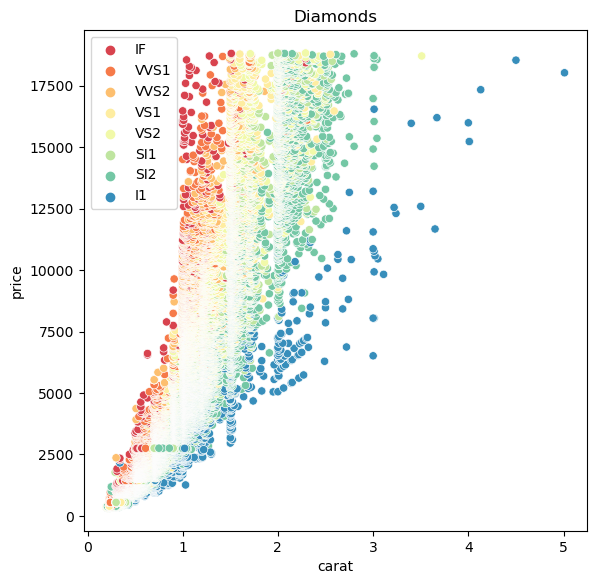

In [198]:
fig, ax = plt.subplots(figsize=(6.5, 6.5))
sns.scatterplot(x="carat", y="price", hue="clarity", palette=sns.color_palette("Spectral", 8), data=diamonds, ax=ax)
ax.set_title("Diamonds")
ax.legend()
plt.show()

### Sec 3: Bar and Distribution Plots ###

#### Histograms ####

In [200]:
penguins = sns.load_dataset("penguins")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


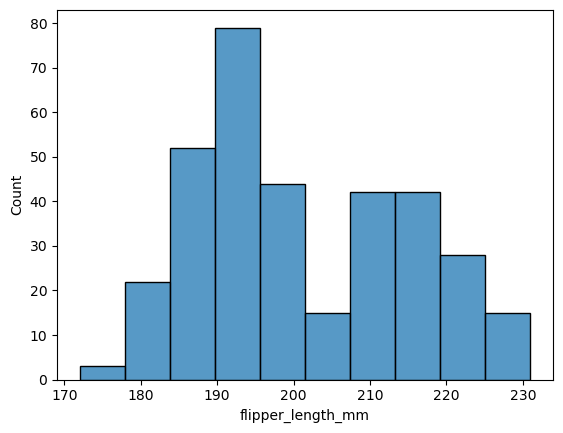

In [201]:
sns.histplot(x="flipper_length_mm", data=penguins)
plt.show()

#### Histograms (horizontal) ####

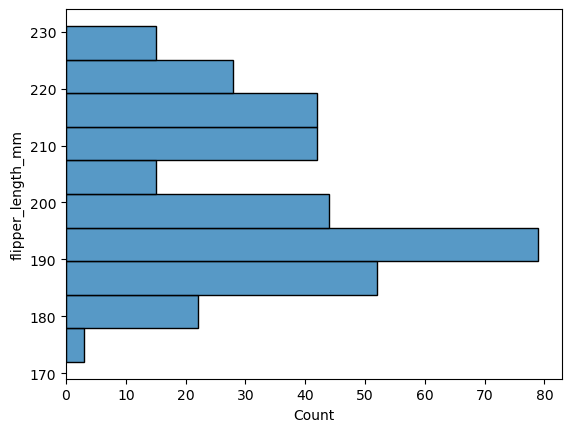

In [202]:
sns.histplot(y="flipper_length_mm", data=penguins)
plt.show()

#### Histograms (change bin width) ####

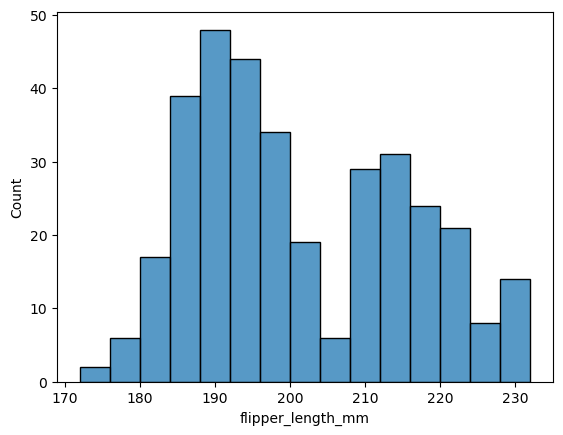

In [203]:
sns.histplot(x="flipper_length_mm", data=penguins, binwidth=4)
plt.show()

#### Histograms (change bin number) ####

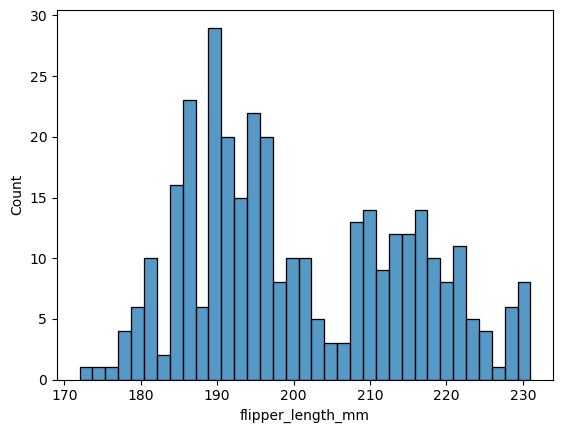

In [204]:
sns.histplot(x="flipper_length_mm", data=penguins, bins=35)
plt.show()

#### Histograms (include pdf) ####

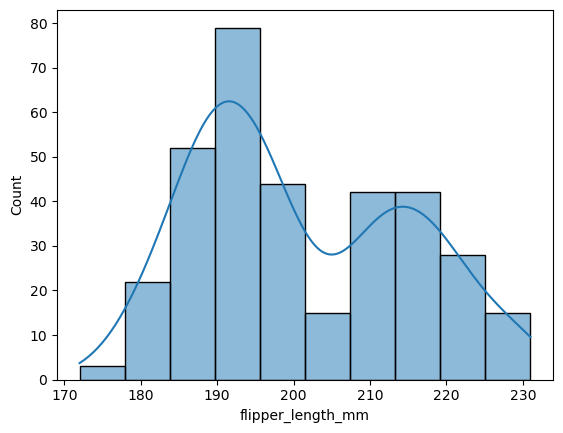

In [205]:
sns.histplot(x="flipper_length_mm", data=penguins, kde=True)
plt.show()

#### Histograms (layering) ####

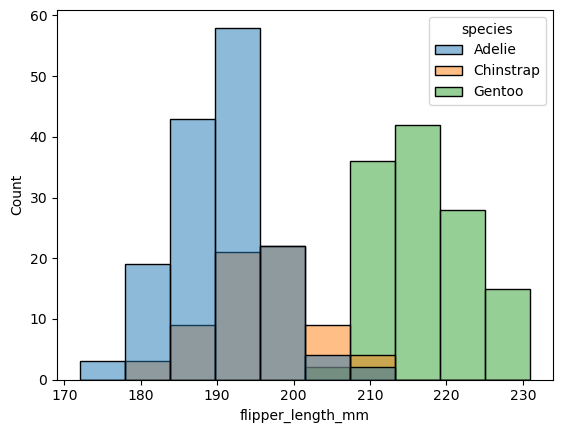

In [206]:
sns.histplot(x="flipper_length_mm", hue="species", data=penguins)
plt.show()

##### Histograms (stacking) ####

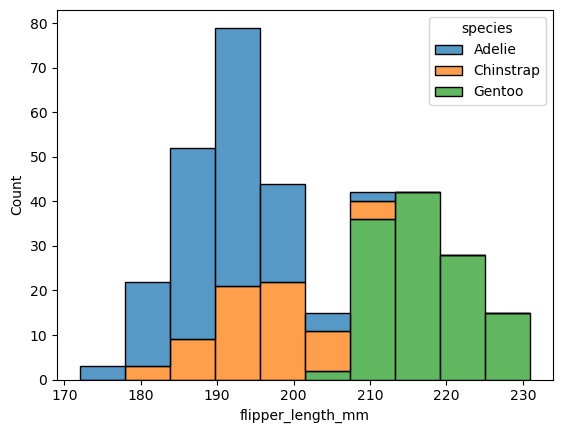

In [207]:
sns.histplot(x="flipper_length_mm", hue="species", multiple="stack", data=penguins)
plt.show()

#### Histograms (dodge) ####

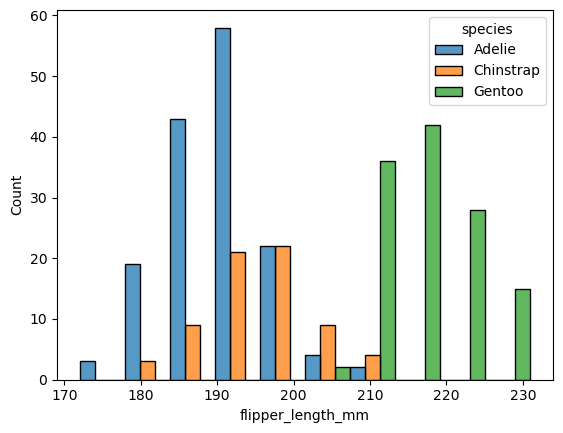

In [208]:
sns.histplot(x="flipper_length_mm", hue="species", multiple="dodge", data=penguins)
plt.show()

#### Histograms (bi-variate) ####

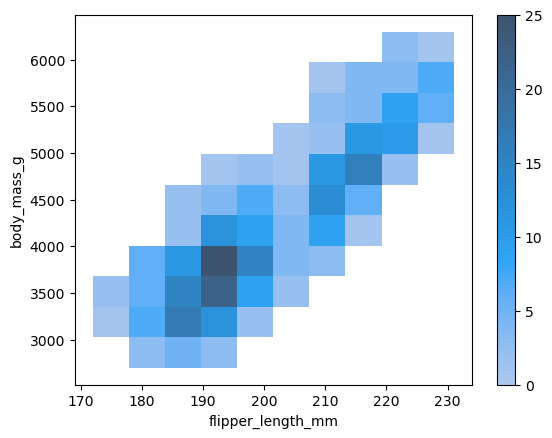

In [209]:
sns.histplot(x="flipper_length_mm", y="body_mass_g", cbar=True, data=penguins)
plt.show()

#### Histograms (facets) ####

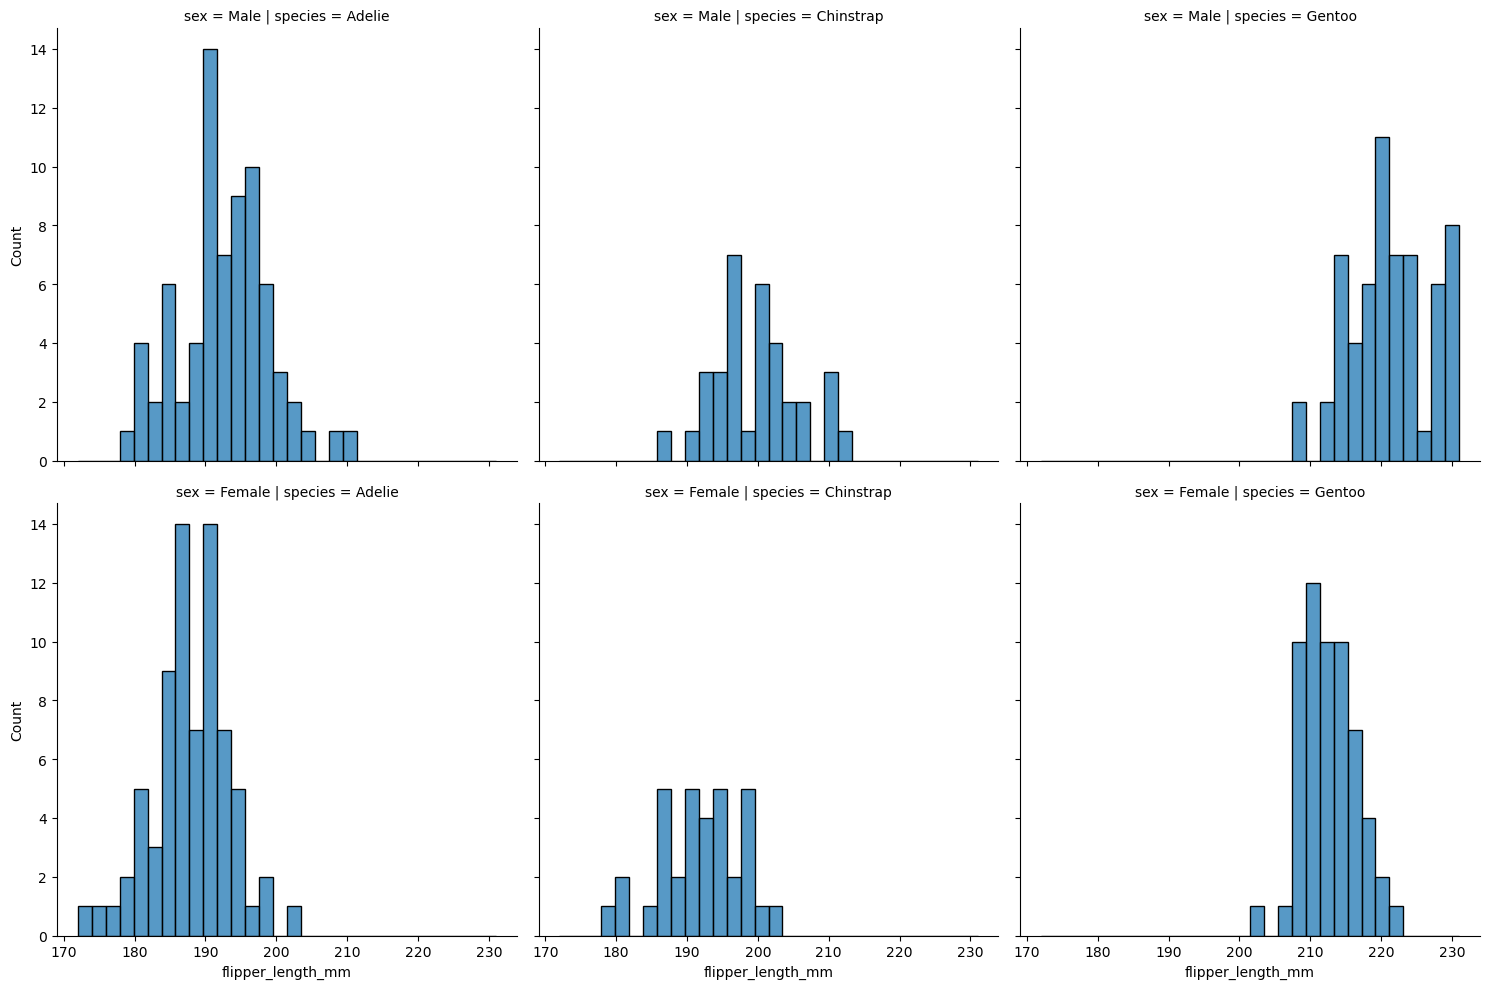

In [210]:
sns.displot(x="flipper_length_mm", col="species", row="sex", bins=30, data=penguins)
plt.show()

### Sec 4: Box and Violin Plots ###

#### Box plots ####

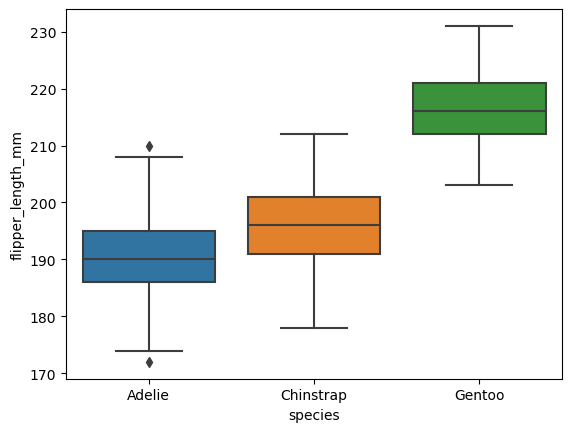

In [211]:
sns.boxplot(x="species", y="flipper_length_mm", data=penguins)
plt.show()

#### Box plots (grouped) ####

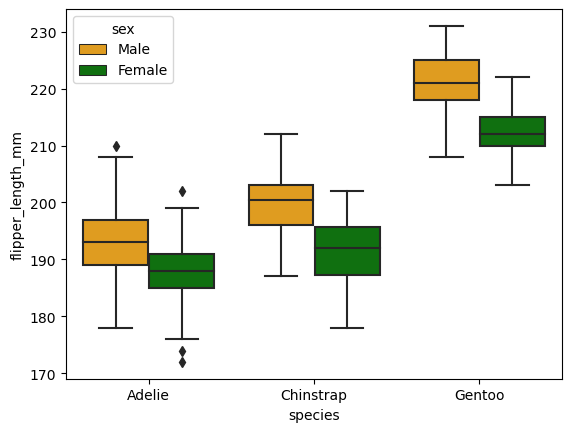

In [212]:
sns.boxplot(x="species", y="flipper_length_mm", hue="sex", palette=["orange","green"], data=penguins)
plt.show()

#### Violin plots ####

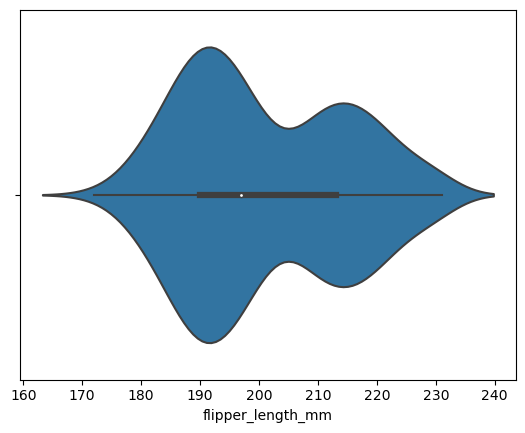

In [213]:
sns.violinplot(x="flipper_length_mm", data=penguins)
plt.show()

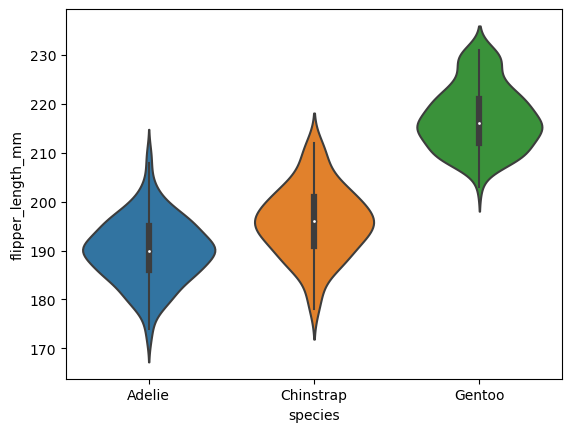

In [214]:
sns.violinplot(x="species", y="flipper_length_mm", data=penguins)
plt.show()

#### Violin plot (grouped) ####

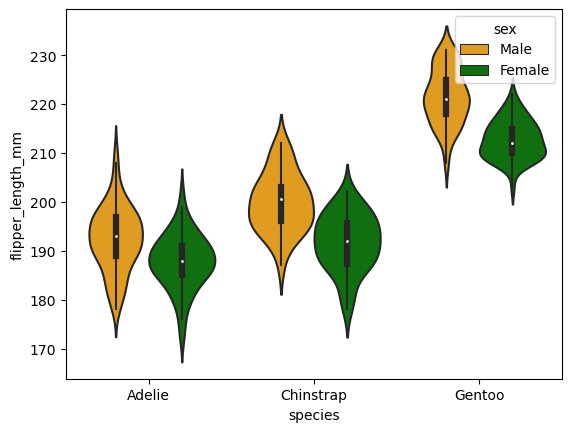

In [215]:
sns.violinplot(x="species", y="flipper_length_mm", hue="sex", palette=["orange","green"], data=penguins)
plt.show()

#### Categorical plots (scatter) ####

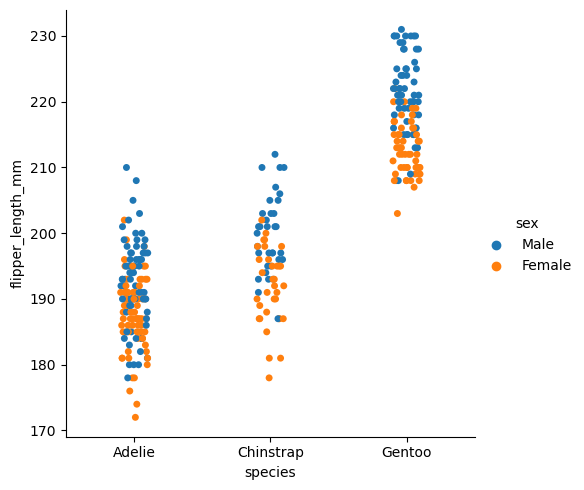

In [219]:
sns.catplot(x="species", y="flipper_length_mm", hue="sex", data=penguins) #use dodge=True to separate
plt.show()

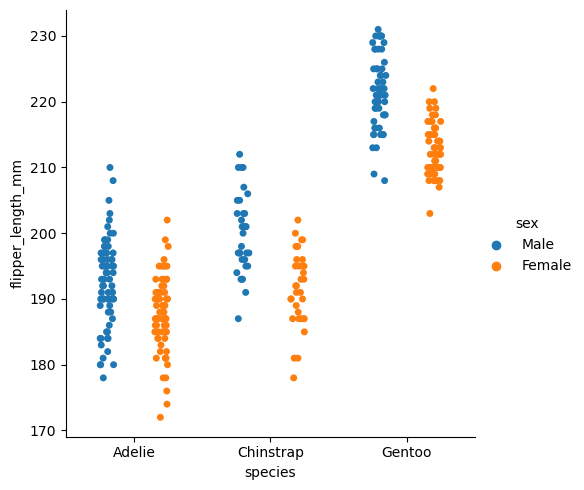

In [220]:
sns.catplot(x="species", y="flipper_length_mm", hue="sex", data=penguins, dodge=True)

#### Categorical plots (box) ####

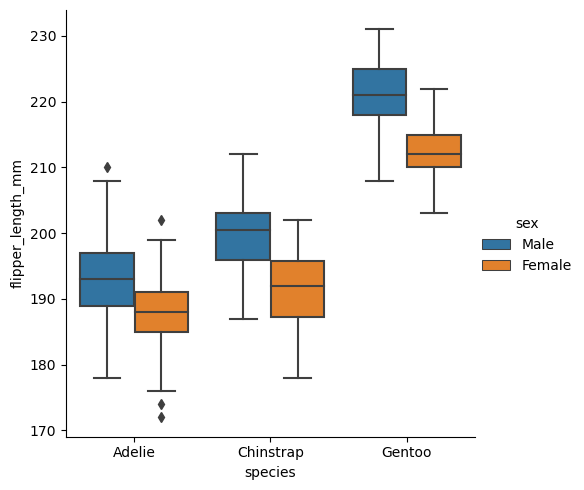

In [221]:
sns.catplot(x="species", y="flipper_length_mm", hue="sex", kind="box", data=penguins)
plt.show()

#### Categorical plots (violin) ####

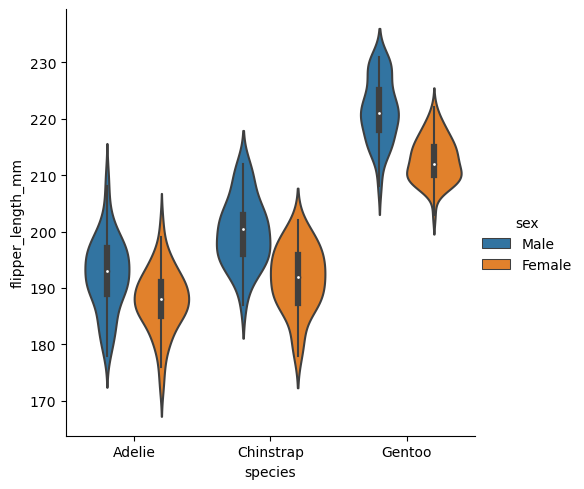

In [222]:
sns.catplot(x="species", y="flipper_length_mm", hue="sex", kind="violin", data=penguins)
plt.show()

#### Categorical plots (bar) ####

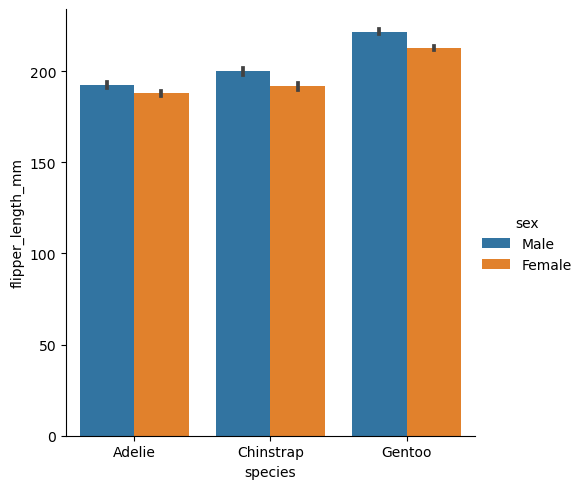

In [223]:
sns.catplot(x="species", y="flipper_length_mm", hue="sex", kind="bar", data=penguins)
plt.show()

### Sec 5: Stacking plots ###

#### Stacking plots ####

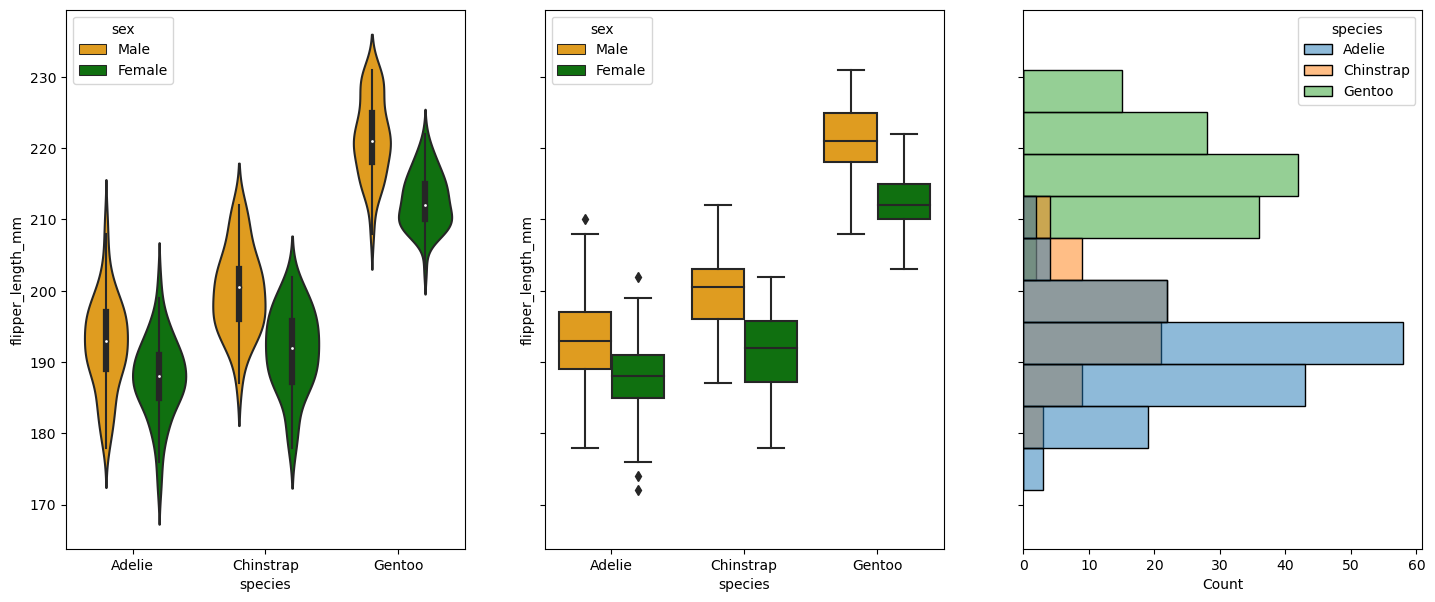

In [227]:
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(17.5, 7), sharey=True)
sns.violinplot(x="species", y="flipper_length_mm", hue="sex", palette=["orange","green"], data=penguins, ax=ax1)
sns.boxplot(x="species", y="flipper_length_mm", hue="sex", palette=["orange","green"], data=penguins, ax=ax2)
sns.histplot(y="flipper_length_mm", hue="species", data=penguins, ax=ax3)
plt.show()

### Sec 6: Regression plots ###

#### Linear regression plots (matplotlib) ####

In [231]:
from sklearn.linear_model import LinearRegression
penguins = sns.load_dataset("penguins")
penguins.dropna(how='any', inplace=True)
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [229]:
new_penguins = penguins[penguins['species']=='Adelie']
new_penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


In [234]:
lm = LinearRegression()
lm.fit(new_penguins['bill_length_mm'].values.reshape(-1,1), new_penguins['bill_depth_mm'].values.reshape(-1,1))
pred_depth = lm.predict(new_penguins['bill_length_mm'].values.reshape(-1,1))
pred_depth

array([[18.39602974],
       [18.46670312],
       [18.60804988],
       [17.97198948],
       [18.43136643],
       [18.36069306],
       [18.41369809],
       [18.74939663],
       [18.30768802],
       [17.60095425],
       [17.95432114],
       [18.32535637],
       [18.99675345],
       [17.56561756],
       [19.6151455 ],
       [18.16634127],
       [18.14867292],
       [17.83064273],
       [18.23701465],
       [18.34302471],
       [17.72463266],
       [18.66105491],
       [18.64338656],
       [18.18400961],
       [18.64338656],
       [18.46670312],
       [18.0603312 ],
       [18.46670312],
       [18.71405994],
       [17.91898445],
       [18.41369809],
       [18.34302471],
       [18.94374842],
       [18.13100458],
       [18.51970815],
       [17.93665279],
       [18.6963916 ],
       [17.84831107],
       [19.27944696],
       [18.02499451],
       [18.48437147],
       [18.74939663],
       [17.84831107],
       [18.96141676],
       [18.48437147],
       [18

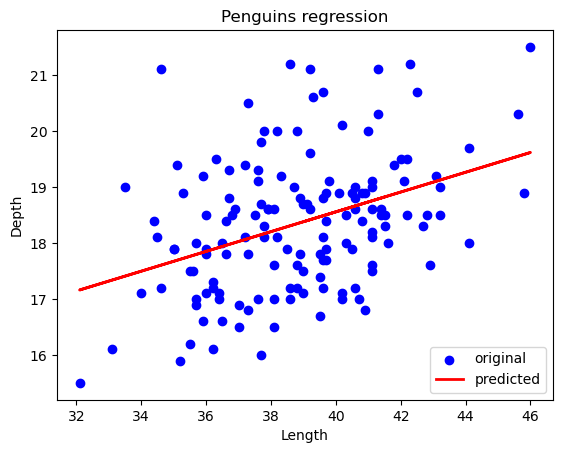

In [235]:
fig, ax = plt.subplots()
ax.scatter(new_penguins['bill_length_mm'].values.reshape(-1,1), new_penguins['bill_depth_mm'].values.reshape(-1,1), color="blue", label='original')
ax.plot(new_penguins['bill_length_mm'].values.reshape(-1,1), pred_depth, color="red", linewidth=2, label='predicted')
ax.set_title("Penguins regression")
ax.set_xlabel("Length")
ax.set_ylabel("Depth")
ax.legend()
plt.show()

#### Linear regression plots (seaborn) ####

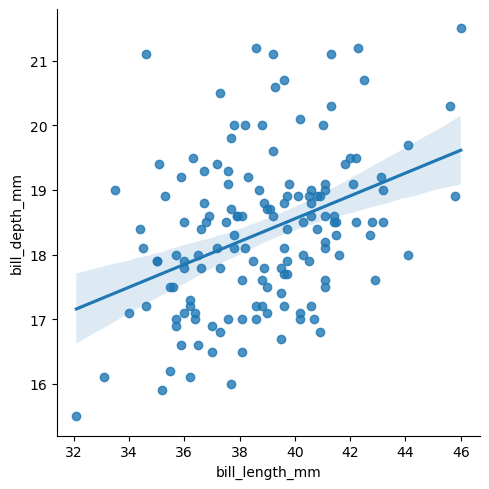

In [236]:
new_penguins = penguins[penguins['species']=='Adelie']
sns.lmplot(x="bill_length_mm", y="bill_depth_mm", data=new_penguins)
plt.show()

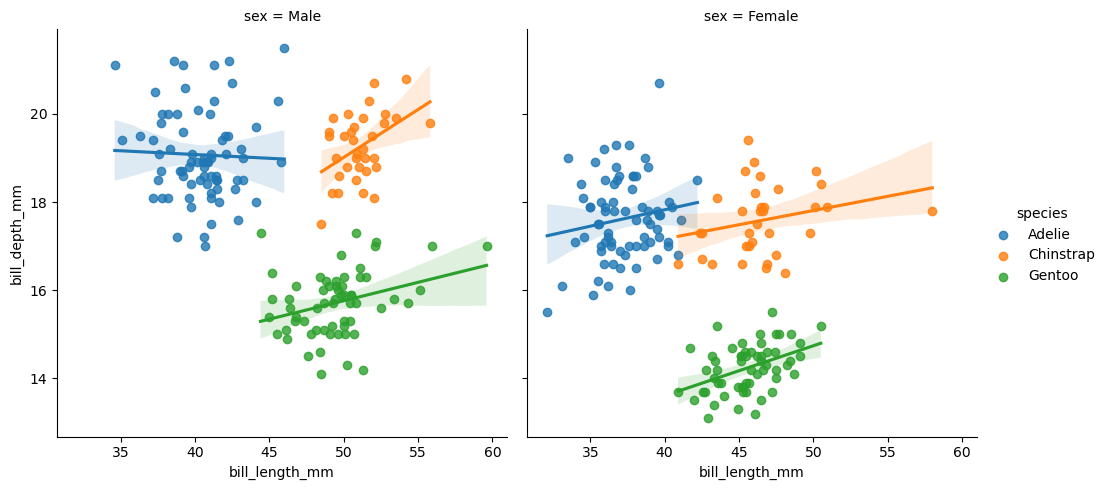

In [237]:
sns.lmplot(x="bill_length_mm", y="bill_depth_mm", hue="species", col="sex", data=penguins)
plt.show()

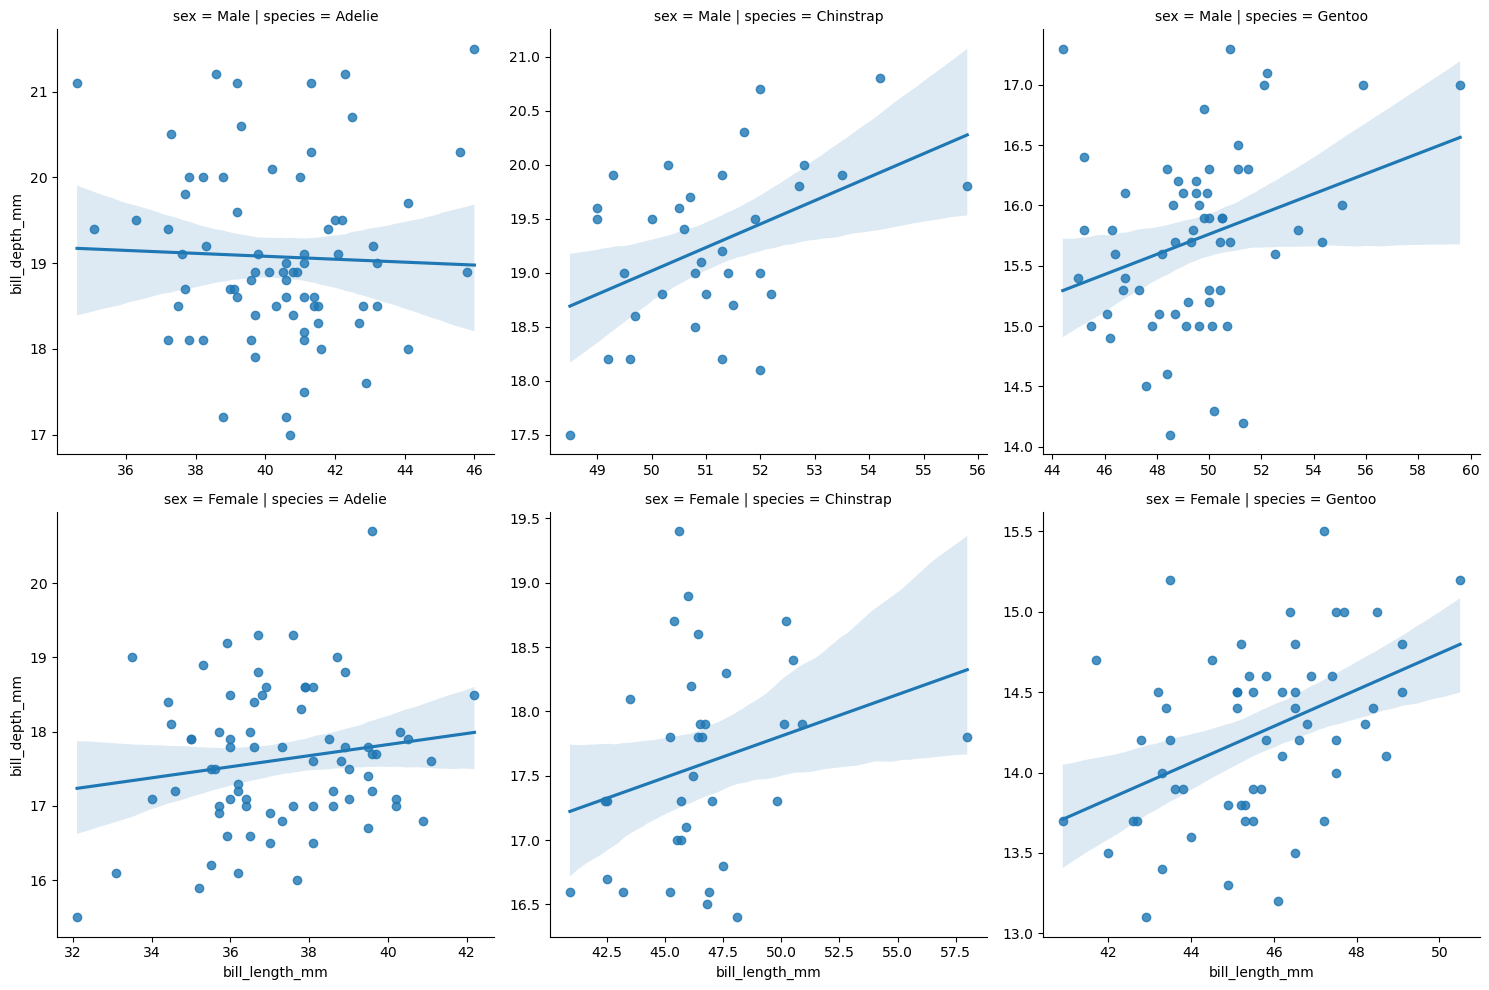

In [238]:
sns.lmplot(x="bill_length_mm", y="bill_depth_mm", col="species", row="sex", facet_kws=dict(sharex=False, sharey=False), data=penguins)
plt.show()

#### Decision boundaries in bi-variate logistic regression ####

c:\Anaconda3\envs\myenv\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


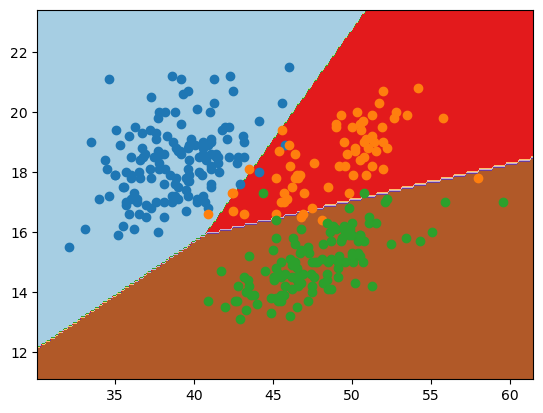

In [240]:
from sklearn.linear_model import LogisticRegression
penguins = sns.load_dataset("penguins")
penguins.dropna(how='any', inplace=True)
X = penguins.iloc[:, [2,3]]
Y = penguins.iloc[:, 0]
colors = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
Y = Y.map(colors)
x1grid = np.arange(X.iloc[:, 0].min()-2, X.iloc[:, 0].max()+2, 0.1)
x2grid = np.arange(X.iloc[:, 1].min()-2, X.iloc[:, 1].max()+2, 0.1)
xx, yy = np.meshgrid(x1grid, x2grid)
grid = np.transpose(np.vstack((xx.flatten(),yy.flatten()))) 
classifier = LogisticRegression()
classifier.fit(X, Y)
yhat = classifier.predict(grid)
zz = yhat.reshape(xx.shape)
plt.contourf(xx, yy, zz, cmap='Paired')
for class_value in range(3):
    plt.scatter(X[Y == class_value].iloc[:,0], X[Y == class_value].iloc[:,1])
plt.show()

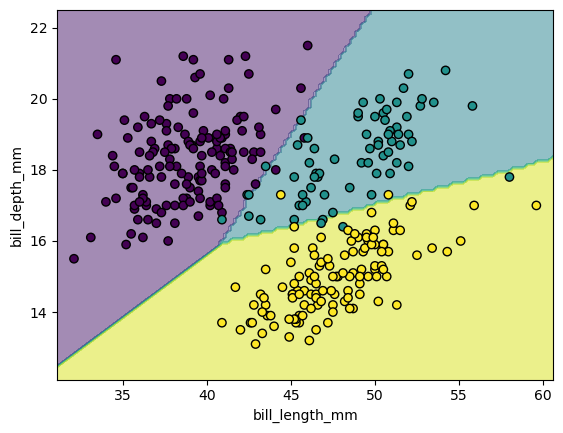

In [243]:
from sklearn.inspection import DecisionBoundaryDisplay
penguins = sns.load_dataset("penguins")
penguins.dropna(how='any', inplace=True)
X = penguins.iloc[:, [2,3]]
Y = penguins.iloc[:, 0]
classifier = LogisticRegression().fit(X, Y)
colors = {'Adelie':0, 'Chinstrap':1, 'Gentoo':2}
fig, ax = plt.subplots()
DecisionBoundaryDisplay.from_estimator(classifier, X, response_method="predict", xlabel=X.columns[0], ylabel=X.columns[1], alpha=0.5, ax=ax)
ax.scatter(X.iloc[:, 0].values.tolist(), X.iloc[:, 1].values.tolist(), c=Y.map(colors), edgecolor="k")
plt.show() 